In [1]:
!pip install yfinance


     |████████████████████████████████| 6.4 MB 3.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 17.5 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=883109b68a9157e5ac23835233325f332c38c98d8055ca5d19ac6902cee70630
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
from datetime import datetime, timedelta 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [44]:
#Loading Data of Nvidia stock

##datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

ticker1 = 'NVDA'
ticker2 = 'AMD'

start = datetime(2021 , 1 ,1)
end = datetime(2021, 12 , 31)

NVDA = yf.download(ticker1, start, end, adjusted=True)

AMD = yf.download(ticker2, start, end, adjusted=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:

import pandas_ta as ta
# Add some indicators
NVDA.ta.stoch(high='high', low='low', k=14, d=3, append=True)
NVDA

,Open,High,Low,Close,Adj Close,Volume,STOCHk_14_3_3,STOCHd_14_3_3
Date,,,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.998260,56064000,NaN,NaN
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.907715,32276000,NaN,NaN
2021-01-06,132.225006,132.449997,125.860001,126.144997,126.013451,58042400,NaN,NaN
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.300842,46148000,NaN,NaN
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.629044,29252800,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200,41.914927,29.816953
2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600,53.733035,41.665682
2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100,60.144433,51.930798


In [46]:
# Avoid case-sensitive issues for accessing data.
# Optional if using pandas_ta
NVDA.columns = [x.lower() for x in NVDA.columns]
# Create our primary chart
# the rows/cols arguments tell plotly we want two figures
fig = make_subplots(rows=2, cols=1)  
# Create our Candlestick chart with an overlaid price line
fig.append_trace(
    go.Candlestick(
        x=NVDA.index,
        open=NVDA['open'],
        high=NVDA['high'],
        low=NVDA['low'],
        close=NVDA['close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1  # <------------ upper chart
)
# price Line
fig.append_trace(
    go.Scatter(
        x=NVDA.index,
        y=NVDA['open'],
        line=dict(color='#ff9900', width=1),
        name='open',
    ), row=1, col=1  # <------------ upper chart
)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=NVDA.index,
        y=NVDA['stochk_14_3_3'],
        line=dict(color='#ff9900', width=2),
        name='fast',
    ), row=2, col=1  #  <------------ lower chart
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=NVDA.index,
        y=NVDA['stochd_14_3_3'],
        line=dict(color='#000000', width=2),
        name='slow'
    ), row=2, col=1 # <------------ lower chart
)
# Extend our y-axis a bit
fig.update_yaxes(range=[-10, 110], row=2, col=1)
# Add upper/lower bounds
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)
# Add overbought/oversold
fig.add_hline(y=20, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=80, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
fig.update_layout(layout)
# View our chart in the system default HTML viewer (Chrome, Firefox, etc.)
fig.show()

In [47]:
NVDA["Signal1"]=0
NVDA["Signal2"]=0
NVDA

,open,high,low,close,adj close,volume,stochk_14_3_3,stochd_14_3_3,Signal1,Signal2
Date,,,,,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.998260,56064000,NaN,NaN,0,0
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.907715,32276000,NaN,NaN,0,0
2021-01-06,132.225006,132.449997,125.860001,126.144997,126.013451,58042400,NaN,NaN,0,0
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.300842,46148000,NaN,NaN,0,0
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.629044,29252800,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200,41.914927,29.816953,0,0
2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600,53.733035,41.665682,0,0
2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100,60.144433,51.930798,0,0


In [48]:
###
# Overbought status
#if NVDA['stochk_14_3_3'] > 80 and NVDA['stochd_14_3_3'] > 80 and NVDA['stochk_14_3_3'] < NVDA['stochd_14_3_3']:
    #NVDA["Signal"]=-1
# Oversold status   
#elif NVDA['stochk_14_3_3'] < 20 and NVDA['stochd_14_3_3']< 20 and NVDA['stochk_14_3_3'] > NVDA['stochd_14_3_3']:
    #NVDA["Signal"]=1
# Something in the middle
#else:
   # NVDA["Signal"]=0
###    

In [49]:
# create a list of our conditions
conditions=[
            (NVDA['stochk_14_3_3'] > 80) & (NVDA['stochd_14_3_3']) > 80 & (NVDA['stochk_14_3_3'] < NVDA['stochd_14_3_3']),
            (NVDA['stochk_14_3_3'] < 20) & (NVDA['stochd_14_3_3']< 20) & (NVDA['stochk_14_3_3'] > NVDA['stochd_14_3_3'])
]

values = [-1,1]
NVDA['Signal1'] = np.select(conditions, values)

NVDA[['Signal1']].value_counts()

Signal1
 0         155
-1          87
 1           9
dtype: int64

In [50]:
NVDA['MA10'] = NVDA['close'].rolling(10).mean()
NVDA['MA50'] = NVDA['close'].rolling(50).mean()
NVDA = NVDA.dropna()
NVDA.head()

,open,high,low,close,adj close,volume,stochk_14_3_3,stochd_14_3_3,Signal1,Signal2,MA10,MA50
Date,,,,,,,,,,,,
2021-03-16,133.565002,135.125000,131.167496,132.912506,132.819733,27212800,53.510998,45.388674,0,0,126.550251,135.507151
2021-03-17,130.397507,134.532501,129.895004,133.412506,133.319397,24386400,63.975106,54.620269,0,0,127.086752,135.552701
2021-03-18,131.365005,131.839996,127.169998,127.224998,127.136192,29389600,61.893533,59.793212,0,0,127.439001,135.416251
2021-03-19,127.500000,129.214996,126.125000,128.457504,128.367828,29920800,59.535667,61.801435,0,0,127.823252,135.462501
2021-03-22,129.127502,133.945007,129.067505,131.862503,131.770462,29780400,62.197578,61.208926,0,0,129.416252,135.430951


In [51]:
conditions = [NVDA['MA10'] > NVDA['MA50'], 
              NVDA['MA10'] < NVDA['MA50']]

#define choices
choices = [1, 0]

#create new column in DataFrame that displays results of comparisons
NVDA['Signal2']= np.select(conditions, choices)

NVDA[['Signal2']].value_counts()

Signal2
1          172
0           30
dtype: int64

In [52]:
NVDA['Close_Next'] = NVDA['close'].shift(-1)
Balance=100000

NVDA["Profit1"]=[NVDA.loc[i, 'Close_Next'] - NVDA.loc[i, 'close'] if NVDA.loc[i, 'Signal1']==1 else 0 for i in NVDA.index]
NVDA["Profit2"]=[NVDA.loc[i, 'Close_Next'] - NVDA.loc[i, 'close'] if NVDA.loc[i, 'Signal2']==1 else 0 for i in NVDA.index]
NVDA

,open,high,low,close,adj close,volume,stochk_14_3_3,stochd_14_3_3,Signal1,Signal2,MA10,MA50,Close_Next,Profit1,Profit2
Date,,,,,,,,,,,,,,,
2021-03-16,133.565002,135.125000,131.167496,132.912506,132.819733,27212800,53.510998,45.388674,0,0,126.550251,135.507151,133.412506,0.0,0.000000
2021-03-17,130.397507,134.532501,129.895004,133.412506,133.319397,24386400,63.975106,54.620269,0,0,127.086752,135.552701,127.224998,0.0,0.000000
2021-03-18,131.365005,131.839996,127.169998,127.224998,127.136192,29389600,61.893533,59.793212,0,0,127.439001,135.416251,128.457504,0.0,0.000000
2021-03-19,127.500000,129.214996,126.125000,128.457504,128.367828,29920800,59.535667,61.801435,0,0,127.823252,135.462501,131.862503,0.0,0.000000
2021-03-22,129.127502,133.945007,129.067505,131.862503,131.770462,29780400,62.197578,61.208926,0,0,129.416252,135.430951,130.707504,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200,41.914927,29.816953,0,1,289.176999,284.970599,309.450012,0.0,13.050018
2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600,53.733035,41.665682,0,1,289.923999,286.810399,303.220001,0.0,-6.230011
2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100,60.144433,51.930798,0,1,292.085001,288.502400,300.010010,0.0,-3.209991


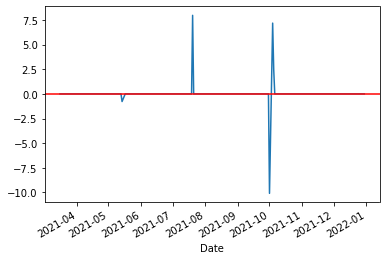

In [53]:
NVDA['Profit1'].plot()
plt.axhline(y=0, color='red')

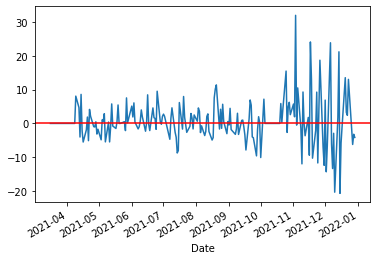

In [54]:
NVDA['Profit2'].plot()
plt.axhline(y=0, color='red')

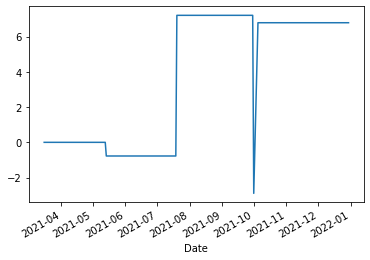

In [55]:
NVDA['Cum_Profit1'] = NVDA['Profit1'].cumsum()
NVDA['Cum_Profit1'].plot()

In [57]:
NVDA['Cum_Profit2'] = NVDA['Profit2'].cumsum()
NVDA['Cum_Profit2'].plot()

,open,high,low,close,adj close,volume,stochk_14_3_3,stochd_14_3_3,Signal1,Signal2,MA10,MA50,Close_Next,Profit1,Profit2,Cum_Profit1,Cum_Profit2
Date,,,,,,,,,,,,,,,,,
2021-03-16,133.565002,135.125000,131.167496,132.912506,132.819733,27212800,53.510998,45.388674,0,0,126.550251,135.507151,133.412506,0.0,0.000000,0.000000,0.000000
2021-03-17,130.397507,134.532501,129.895004,133.412506,133.319397,24386400,63.975106,54.620269,0,0,127.086752,135.552701,127.224998,0.0,0.000000,0.000000,0.000000
2021-03-18,131.365005,131.839996,127.169998,127.224998,127.136192,29389600,61.893533,59.793212,0,0,127.439001,135.416251,128.457504,0.0,0.000000,0.000000,0.000000
2021-03-19,127.500000,129.214996,126.125000,128.457504,128.367828,29920800,59.535667,61.801435,0,0,127.823252,135.462501,131.862503,0.0,0.000000,0.000000,0.000000
2021-03-22,129.127502,133.945007,129.067505,131.862503,131.770462,29780400,62.197578,61.208926,0,0,129.416252,135.430951,130.707504,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200,41.914927,29.816953,0,1,289.176999,284.970599,309.450012,0.0,13.050018,6.785019,138.935013
2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600,53.733035,41.665682,0,1,289.923999,286.810399,303.220001,0.0,-6.230011,6.785019,132.705002
2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100,60.144433,51.930798,0,1,292.085001,288.502400,300.010010,0.0,-3.209991,6.785019,129.495010


In [42]:
NVDA["Profit1"].fillna(0, inplace=True)
NVDA["Profit2"].fillna(0, inplace=True)

,open,high,low,close,adj close,volume,stochk_14_3_3,stochd_14_3_3,Signal1,Signal2,MA10,MA50,Close_Next,Profit1,Profit2,Cum_Profit1,Cum_Profit2
Date,,,,,,,,,,,,,,,,,
2021-03-16,133.565002,135.125000,131.167496,132.912506,132.819733,27212800,53.510998,45.388674,0,0,126.550251,135.507151,133.412506,0.0,0.000000,0.000000,0.000000
2021-03-17,130.397507,134.532501,129.895004,133.412506,133.319397,24386400,63.975106,54.620269,0,0,127.086752,135.552701,127.224998,0.0,0.000000,0.000000,0.000000
2021-03-18,131.365005,131.839996,127.169998,127.224998,127.136185,29389600,61.893533,59.793212,0,0,127.439001,135.416251,128.457504,0.0,0.000000,0.000000,0.000000
2021-03-19,127.500000,129.214996,126.125000,128.457504,128.367828,29920800,59.535667,61.801435,0,0,127.823252,135.462501,131.862503,0.0,0.000000,0.000000,0.000000
2021-03-22,129.127502,133.945007,129.067505,131.862503,131.770462,29780400,62.197578,61.208926,0,0,129.416252,135.430951,130.707504,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200,41.914927,29.816953,0,1,289.176999,284.970599,309.450012,0.0,13.050018,6.785019,138.935013
2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600,53.733035,41.665682,0,1,289.923999,286.810399,303.220001,0.0,-6.230011,6.785019,132.705002
2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100,60.144433,51.930798,0,1,292.085001,288.502400,300.010010,0.0,-3.209991,6.785019,129.495010


In [61]:
buy1=NVDA[NVDA.Signal1==1].first_valid_index()
buy2=NVDA[NVDA.Signal2==1].first_valid_index()


In [68]:

NVDA1=NVDA.copy()
NVDA1.reset_index(inplace=True)
buy1=NVDA1[NVDA1.Signal1==1].first_valid_index()
buy2=NVDA1[NVDA1.Signal2==1].first_valid_index()
NVDA1.loc[buy1, 'Profit11'] = 100000/NVDA1.loc[buy1, 'close']
NVDA1.loc[buy2, 'Profit22'] = 100000/NVDA1.loc[buy2, 'close']
Balance = 100000
shares1= 100000/NVDA1.loc[buy1, 'close']
shares2= 100000/NVDA1.loc[buy2, 'close']

,Date,open,high,low,close,adj close,volume,stochk_14_3_3,stochd_14_3_3,Signal1,Signal2,MA10,MA50,Close_Next,Profit1,Profit2,Cum_Profit1,Cum_Profit2,Profit11,Profit22
0,2021-03-16,133.565002,135.125000,131.167496,132.912506,132.819733,27212800,53.510998,45.388674,0,0,126.550251,135.507151,133.412506,0.0,0.000000,0.000000,0.000000,NaN,NaN
1,2021-03-17,130.397507,134.532501,129.895004,133.412506,133.319397,24386400,63.975106,54.620269,0,0,127.086752,135.552701,127.224998,0.0,0.000000,0.000000,0.000000,NaN,NaN
2,2021-03-18,131.365005,131.839996,127.169998,127.224998,127.136192,29389600,61.893533,59.793212,0,0,127.439001,135.416251,128.457504,0.0,0.000000,0.000000,0.000000,NaN,NaN
3,2021-03-19,127.500000,129.214996,126.125000,128.457504,128.367828,29920800,59.535667,61.801435,0,0,127.823252,135.462501,131.862503,0.0,0.000000,0.000000,0.000000,NaN,NaN
4,2021-03-22,129.127502,133.945007,129.067505,131.862503,131.770462,29780400,62.197578,61.208926,0,0,129.416252,135.430951,130.707504,0.0,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2021-12-23,297.549988,300.589996,294.309998,296.399994,296.349487,34302200,41.914927,29.816953,0,1,289.176999,284.970599,309.450012,0.0,13.050018,6.785019,138.935013,NaN,NaN
198,2021-12-27,296.600006,310.869995,296.399994,309.450012,309.397308,40368600,53.733035,41.665682,0,1,289.923999,286.810399,303.220001,0.0,-6.230011,6.785019,132.705002,NaN,NaN
199,2021-12-28,313.119995,313.299988,300.119995,303.220001,303.168335,42059100,60.144433,51.930798,0,1,292.085001,288.502400,300.010010,0.0,-3.209991,6.785019,129.495010,NaN,NaN
200,2021-12-29,302.730011,305.480011,293.660004,300.010010,299.958893,34313900,63.278685,59.052051,0,1,293.749002,290.058200,295.859985,0.0,-4.150024,6.785019,125.344986,NaN,NaN


In [69]:
NVDA1.drop(NVDA1.tail(1).index,inplace=True)
NVDA["Cum_Profit1"]= NVDA["Cum_Profit1"]*shares1
NVDA["Cum_Profit2"]= NVDA["Cum_Profit2"]*shares2


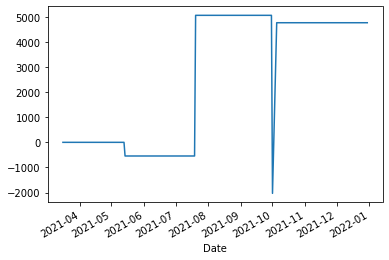

In [70]:
NVDA['Cum_Profit1'].plot()

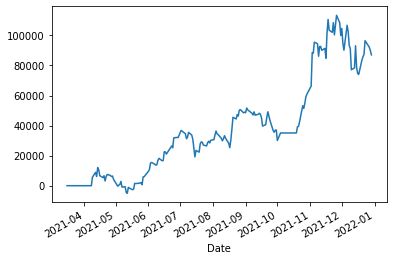

In [74]:
NVDA['Cum_Profit2'].plot()


Date
2021-03-16       0.000000
2021-03-17       0.000000
2021-03-18       0.000000
2021-03-19       0.000000
2021-03-22       0.000000
                 ...     
2021-12-23    4763.757123
2021-12-27    4763.757123
2021-12-28    4763.757123
2021-12-29    4763.757123
2021-12-30    4763.757123
Name: Cum_Profit1, Length: 202, dtype: float64